#RESEARCH QUESTION ANALYSIS and ML MODEL ANALYSIS

#QUESTION_1: 
Which specific health indicators and lifestyle factors demonstrate the highest predictive power for identifying individuals at risk of developing diabetes?

Accuracy of Logistic Regression Model: 0.8421250271755243
+-----------------+------------+
|          Feature| Coefficient|
+-----------------+------------+
|              BMI|-0.036938164|
|           HighBP| -0.76543576|
|        CholCheck| -0.86239284|
|     PhysActivity|  0.24155973|
|           Fruits| 0.032003567|
|          Veggies|  0.10794148|
|HvyAlcoholConsump|  0.41813102|
+-----------------+------------+



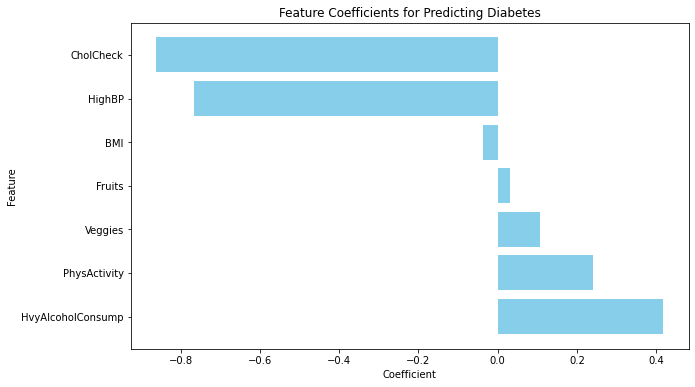

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
# Load your DataFrame
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/rsomashe@gmu.edu/cleaned_diabetes_dataset-2.csv")

# Change datatype of all columns to float
for column in df1.columns:
    df1 = df1.withColumn(column, col(column).cast("float"))

# Feature columns
parameters = ['BMI', 'HighBP', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Assemble features
assembler = VectorAssembler(inputCols=parameters, outputCol="features")
data = assembler.transform(df1)

# Split data into train and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train logistic regression model
lr = LogisticRegression(labelCol="Diabetes_012", featuresCol="features")
lr_model = lr.fit(train_data)

# Make predictions
predictions = lr_model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_012", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy of Logistic Regression Model:", accuracy)

# Feature coefficients
coefficient_matrix = lr_model.coefficientMatrix

# Create DataFrame from coefficientMatrix with explicit schema
schema = StructType([
    StructField("Feature", StringType(), False),
    StructField("Coefficient", FloatType(), False)
])
coefficients = [(parameters[i], float(coeff)) for i, coeff in enumerate(coefficient_matrix.toArray()[0])]
coefficients_df = spark.createDataFrame(coefficients, schema=schema)

# Display feature coefficients
coefficients_df.show()
# Plot feature coefficients using a bar plot
coefficients_pd = coefficients_df.toPandas()
coefficients_pd = coefficients_pd.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coefficients_pd['Feature'], coefficients_pd['Coefficient'], color='skyblue')
plt.title('Feature Coefficients for Predicting Diabetes')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

This also runs a Machine Learning Model - LOGISTIC REGRESSION

#QUESTION_2
How do socio-demographic factors influence the prevalence of diabetes across diverse demographic groups, and are there variations in their impact among different population subsets?

<AxesSubplot:title={'center':'Prevalence of Diabetes Across Age'}, ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Sex'}, ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Education'}, ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Income'}, ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Age'}, xlabel='Age', ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Sex'}, xlabel='Sex', ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Education'}, xlabel='Education', ylabel='Prevalence of Diabetes'><AxesSubplot:title={'center':'Prevalence of Diabetes Across Income'}, xlabel='Income', ylabel='Prevalence of Diabetes'>

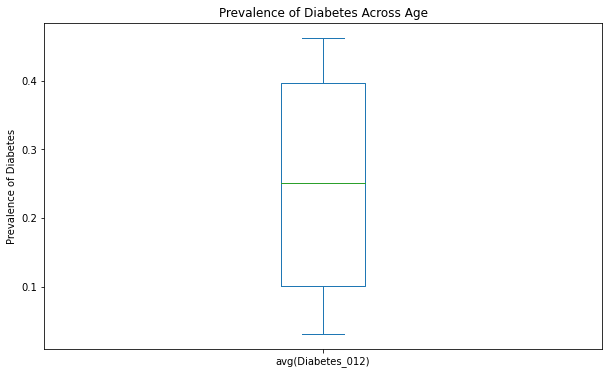

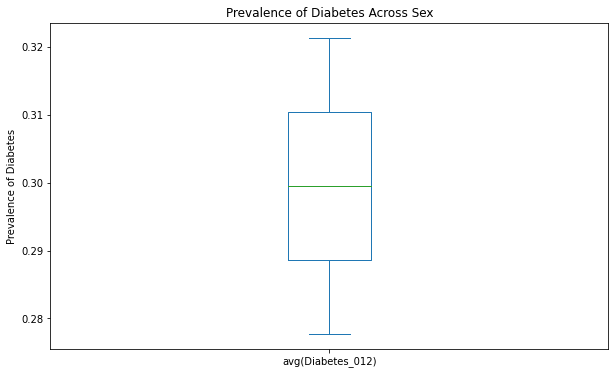

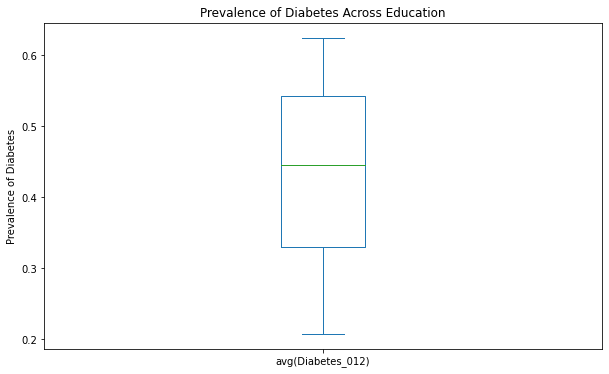

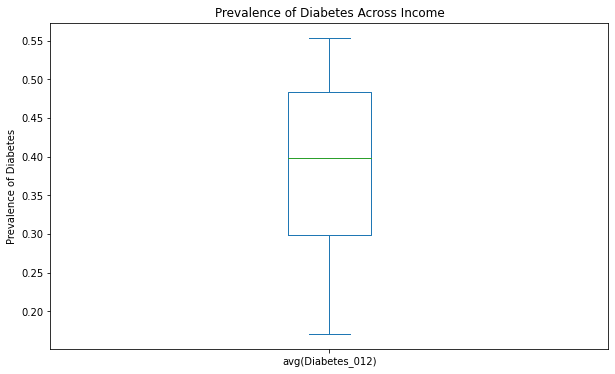

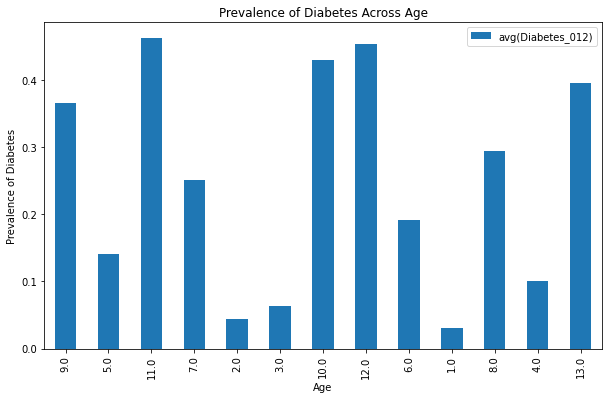

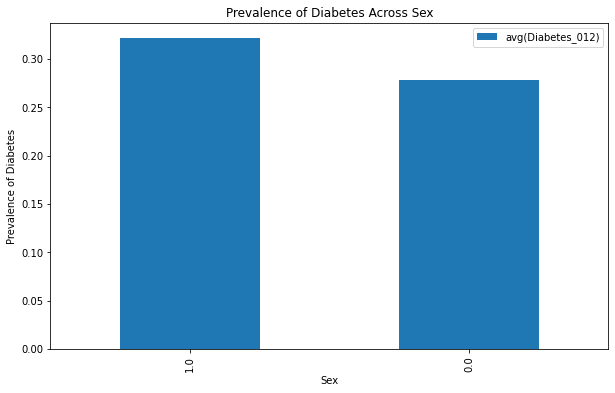

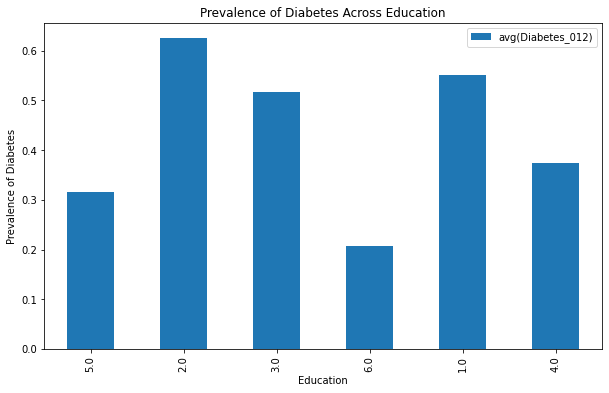

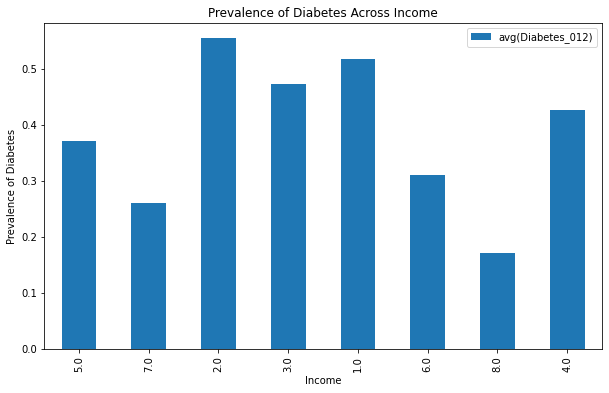

In [0]:
for column in df1.columns:
    df1 = df1.withColumn(column, df1[column].cast("float"))

# Define socio-demographic variables of interest
demographic_variables = ['Age', 'Sex', 'Education', 'Income']

# Visualize the prevalence of diabetes across demographic groups using box plots
for variable in demographic_variables:
    display(df1.groupby(variable).agg({"Diabetes_012": "mean"}).toPandas().plot(kind='box', x=variable, y='avg(Diabetes_012)', figsize=(10, 6), title=f'Prevalence of Diabetes Across {variable}', xlabel=variable, ylabel='Prevalence of Diabetes'))

# Alternatively, you can use violin plots for a more detailed view
for variable in demographic_variables:
    display(df1.groupby(variable).agg({"Diabetes_012": "mean"}).toPandas().plot(kind='bar', x=variable, y='avg(Diabetes_012)', figsize=(10, 6), title=f'Prevalence of Diabetes Across {variable}', xlabel=variable, ylabel='Prevalence of Diabetes'))

#QUESTION_3
What are the distinct associations between behavioral factors and the likelihood of developing diabetes, and how do these associations vary across different
demographic groups and population subgroups?

PhysActivity Diabetes_012 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 2.

Fruits Diabetes_012 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 1.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 1.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 2.0 1.0 2.0 1.0 

Veggies Diabetes_012 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 1.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 1.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 2.0 1.0

Smoker Diabetes_012 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 1.0 1.0 1.0 2.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 2.0 1.0 2.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 1.0 1.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 2.0 0.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 1.0 1.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 1.0 0.0 1.0 2.0 0.0 2.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 2.0 0.0 0.0 1.0 2.0 1.0 2.0 1.0 

HvyAlcoholConsump Diabetes_012 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 0.0 2.0 0.0 2.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 1.0 0.0 2.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 2.0 0.0 0.0 1.0 2.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 1.0 2.0 0.0 2.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.0 1.0 0.0 0.0 2.0 0

PhysActivity Sex 0.0 1.0 2.0 1.0 0.0 93067 1737 10850 0.0 0.0 27892 867 7561 0.0 1.0 19320 622 5498 1.0 1.0 73424 1405 11437

Fruits Sex 0.0 1.0 2.0 1.0 0.0 82433 1629 11516 0.0 0.0 38526 975 6895 0.0 1.0 37761 867 7758 1.0 1.0 54983 1160 9177

Veggies Sex 0.0 1.0 2.0 1.0 0.0 102221 2027 14143 0.0 0.0 18738 577 4268 0.0 1.0 19421 493 4342 1.0 1.0 73323 1534 12593

Smoker Sex 0.0 1.0 2.0 1.0 0.0 47597 1142 8320 0.0 0.0 73362 1462 10091 0.0 1.0 48517 887 6938 1.0 1.0 44227 1140 9997

HvyAlcoholConsump Sex 0.0 1.0 2.0 1.0 0.0 7409 93 310 0.0 0.0 113550 2511 18101 0.0 1.0 86937 1912 16413 1.0 1.0 5807 115 522

PhysActivity Fruits Veggies Smoker HvyAlcoholConsump Diabetes_012 1.0 0.14275586273807384 0.1531495702307852 -0.0874011625334293 0.012392236192434356 -0.1219471665503514 0.14275586273807384 1.0 0.2543422444319789 -0.07766583861075665 -0.035287732906117 -0.042191629854507376 0.1531495702307852 0.2543422444319789 1.0 -0.030677709807192914 0.02106448108257833 -0.05897159923470322 -0.0874011625334293 -0.07766583861075665 -0.030677709807192914 1.0 0.10161868704672687 0.06291409506016639 0.012392236192434356 -0.035287732906117 0.02106448108257833 0.10161868704672687 1.0 -0.05788191173818502 -0.1219471665503514 -0.042191629854507376 -0.05897159923470322 0.06291409506016639 -0.05788191173818502 1.0

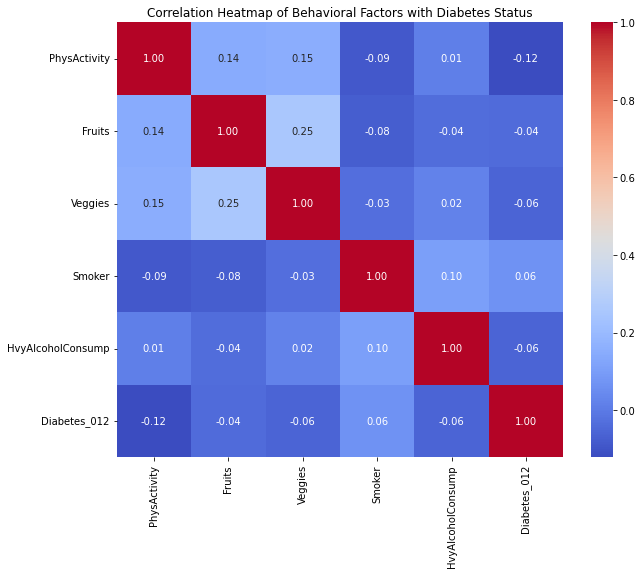

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define behavioral factors of interest
behavioral_factors = ['PhysActivity', 'Fruits', 'Veggies', 'Smoker', 'HvyAlcoholConsump']

# Scatter plots to visualize associations between behavioral factors and diabetes
for factor in behavioral_factors:
    display(data.select(factor, 'Diabetes_012'))

# Box plots to visualize associations between behavioral factors and diabetes across demographic groups
for factor in behavioral_factors:
    display(data.groupBy(factor, 'Sex').pivot('Diabetes_012').count())

# Heatmap to visualize correlations between behavioral factors and diabetes
correlation_df = data.select(behavioral_factors + ['Diabetes_012']).toPandas()
display(correlation_df.corr())
# Heatmap to visualize correlations between behavioral factors and diabetes
correlation_df = data.select(behavioral_factors + ['Diabetes_012']).toPandas()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Behavioral Factors with Diabetes Status')
plt.show()


#MACHINE LEARNING MODEL - DECISION TREE

In [0]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
import matplotlib.pyplot as plt

# Change datatype of all columns to float
for column in df1.columns:
    df1 = df1.withColumn(column, df1[column].cast("float"))

# Feature columns
parameters = ['BMI', 'HighBP', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Assemble features
assembler = VectorAssembler(inputCols=parameters, outputCol="features")
data = assembler.transform(df1)

# Split data into train and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train decision tree model
dt = DecisionTreeClassifier(labelCol="Diabetes_012", featuresCol="features", maxDepth=4)
dt_model = dt.fit(train_data)

# Make predictions
predictions = dt_model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_012", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy of Decision Tree Model:", accuracy)

# Convert PySpark DecisionTreeModel to PySpark MLlib DecisionTreeModel
mllib_dt_model = dt_model._java_obj.toOld()

# Visualize the decision tree (Note: Visualization in PySpark is not as straightforward as in scikit-learn)
# You may need to convert the model to a string format and then visualize it using external tools or libraries
tree_string = mllib_dt_model.toDebugString()
print("Decision Tree Model:\n", tree_string)

Accuracy of Decision Tree Model: 0.8440816649208451
Decision Tree Model:
 DecisionTreeModel classifier of depth 0 with 1 nodes
  Predict: 0.0



In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from graphviz import Source
import re

# Change datatype of all columns to float
for column in df1.columns:
    df1 = df1.withColumn(column, df1[column].cast("float"))

# Feature columns
parameters = ['BMI', 'HighBP', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Assemble features
assembler = VectorAssembler(inputCols=parameters, outputCol="features")
data = assembler.transform(df1)

# Split data into train and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train decision tree model
dt = DecisionTreeClassifier(labelCol="Diabetes_012", featuresCol="features", maxDepth=4)
dt_model = dt.fit(train_data)

# Extract decision tree structure
def extract_tree_structure(tree_model):
    # Extract feature names
    feature_names = parameters

    # Extract rules from the decision tree model
    tree_rules = tree_model._java_obj.toDebugString().split("\n")
    tree_structure = []

    # Parse each rule
    for rule in tree_rules:
        if rule.strip() == "":
            continue
        # Extract feature and threshold from the rule
        match = re.match(r'\s+\|\s+(.*)(<=|>) (.*)$', rule)
        if match:
            feature = feature_names[int(match.group(1))]
            operator = "<=" if match.group(2) == "<=" else ">"
            threshold = float(match.group(3))
            tree_structure.append((feature, operator, threshold))
    return tree_structure

# Convert tree structure to DOT format
def convert_to_dot(tree_structure):
    dot_format = "digraph Tree {\nnode [shape=box, style=\"filled\", color=\"black\"] ;\n"
    for i, (feature, operator, threshold) in enumerate(tree_structure):
        dot_format += f"{i} [label=\"{feature} {operator} {threshold:.2f}\"] ;\n"
        left_child = i * 2 + 1
        right_child = i * 2 + 2
        if left_child < len(tree_structure):
            dot_format += f"{i} -> {left_child} ;\n"
        if right_child < len(tree_structure):
            dot_format += f"{i} -> {right_child} ;\n"
    dot_format += "}"
    return dot_format

# Visualize the decision tree within Databricks notebook
def visualize_decision_tree(tree_structure):
    dot_format = convert_to_dot(tree_structure)
    displayHTML(Source(dot_format).pipe(format='png'))

# Extract decision tree structure
tree_structure = extract_tree_structure(dt_model)

# Visualize the decision tree
visualize_decision_tree(tree_structure)


iVBORw0KGgoAAAANSUhEUgAAAAsAAAALCAYAAACprHcmAAAABmJLR0QA/wD/AP+gvaeTAAAAJ0lEQVQYlWP8////fwbiwGomIhUyMDAwMIwqpo9iFgYGhtVEqj0BAAvPBjJ63HJVAAAAAElFTkSuQmCC

#MACHINE LEARNING MODEL - RANDOM FOREST MODEL

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.types import StructType, StructField, StringType, FloatType
from pyspark.sql.functions import col
import numpy as np

# Change datatype of all columns to float
for column in df1.columns:
    df1 = df1.withColumn(column, col(column).cast("float"))

# Feature columns
parameters = ['BMI', 'HighBP', 'CholCheck', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

# Assemble features
assembler = VectorAssembler(inputCols=parameters, outputCol="features")
data = assembler.transform(df1)

# Split data into train and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Train Random Forest model
rf = RandomForestClassifier(labelCol="Diabetes_012", featuresCol="features", numTrees=100, seed=42)
rf_model = rf.fit(train_data)

# Make predictions
predictions = rf_model.transform(test_data)

# Evaluate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Diabetes_012", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy of Random Forest Model:", accuracy)

Accuracy of Random Forest Model: 0.8440816649208451
